In [1]:
import sys
sys.path.append("../src")


import jax

In [2]:
jax.config.update('jax_platform_name', 'cpu')  # Force CPU-only mode

In [3]:
# !pip install gymnax

In [4]:
from match_three.env import EnvParams, EnvState, MatchThree

params = EnvParams()
env = MatchThree(params)

env.default_params

W0000 00:00:1745435850.383606 52615891 mps_client.cc:510] WARNING: JAX Apple GPU support is experimental and not all JAX functionality is correctly supported!
I0000 00:00:1745435850.404960 52615891 service.cc:145] XLA service 0x1615d1c70 initialized for platform METAL (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745435850.405134 52615891 service.cc:153]   StreamExecutor device (0): Metal, <undefined>
I0000 00:00:1745435850.412576 52615891 mps_client.cc:406] Using Simple allocator.
I0000 00:00:1745435850.412587 52615891 mps_client.cc:384] XLA backend will use up to 5726158848 bytes on device 0 for SimpleAllocator.


Metal device set to: Apple M3

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



EnvParams(max_steps_in_episode=100, grid_params=MatchThreeGameGridParams(num_symbols=4, mask=Array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)), grid_size=(9, 9))

In [5]:
import matplotlib.pyplot as plt
import jax.numpy as jnp

def plot_grid(grid, ax, matches=None, vmin=None, vmax=None):
    ax.grid(color="white", linewidth=2)
    ax.set_xticks(jnp.arange(-0.5, 9.5, 1), [])
    ax.set_yticks(jnp.arange(-0.5, 9.5, 1), [])

    # TODO: this should be tested
    if matches is not None:
        # Highlight matched cells with red borders
        for i in range(len(matches)):
            for j in range(len(matches[0])):
                if matches[i, j]:
                    # Draw a red rectangle around the matched cell
                    ax.add_patch(
                        plt.Rectangle(
                            (j, i),
                            1,
                            1,
                            fill=False,
                            edgecolor="red",
                            lw=3,  # Border thickness
                        )
                    )

    ax.imshow(grid, vmin=vmin, vmax=vmax)

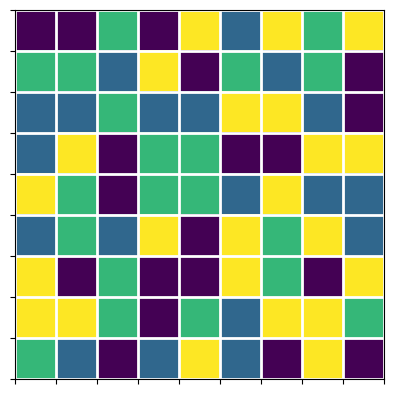

In [6]:
key = jax.random.PRNGKey(0)

key, subkey = jax.random.split(key)
obs, state = jax.jit(env.reset_env)(subkey, params)

plot_grid(obs.grid, plt.gca())

In [7]:
print(obs.grid)

[[1 1 3 1 4 2 4 3 4]
 [3 3 2 4 1 3 2 3 1]
 [2 2 3 2 2 4 4 2 1]
 [2 4 1 3 3 1 1 4 4]
 [4 3 1 3 3 2 4 2 2]
 [2 3 2 4 1 4 3 4 2]
 [4 1 3 1 1 4 3 1 4]
 [4 4 3 1 3 2 4 4 3]
 [3 2 1 2 4 2 1 4 1]]


1
1
3
Traced<ShapedArray(int32[9,9])>with<DynamicJaxprTrace>
grid delta = [[ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0 -3  0  0  0  0  0  0]
 [ 0  0 -3  0  0  0  0  0  0]
 [ 0  0 -3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]
grid delta = [[ 0  0  0  0  0  0  0  0  0]
 [-3 -3 -3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0 -3 -3 -3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0 -1 -1 -1 -1  0  0  0  0]
 [ 0  0 -1  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0  0  0  0]]
grid delta = [[ 0  0  0  0  0  0  0  0  0]
 [ 0 -3 -3 -3  0  0  0  0  0]
 [ 0  0  0  0 -4 -4 -4  0  0]
 [ 0  0  0  0 -1 -1 -1  0  0]
 [-4 -4 -4 -2 -2 -2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]
grid delta = [[ 0 -4 -4 -4  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 

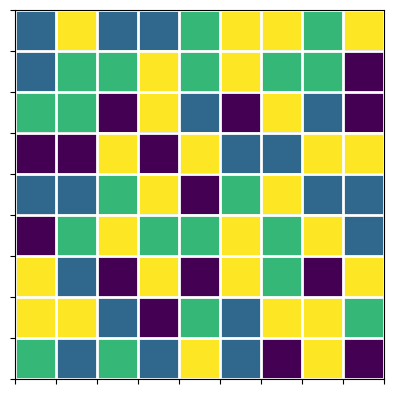

1 61.706005


In [8]:
key, subkey = jax.random.split(key)

print(obs.grid[0, 0])
print(obs.grid[0, 1])
print(obs.grid[1, 0])

# NOTE: this is a very good move. 42 blocks gone with 5 cascades.
obs, state, reward, done = jax.jit(env.step_env)(key=subkey, state=state, action=jnp.asarray([5,2,1]), params=params)

plot_grid(obs.grid, plt.gca())
plt.show()
print(state.time, reward)